In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [3]:
url = "http://books.toscrape.com/"

# TODO: Use 'requests' to do an HTTP request to fetch data located at that URL
response = requests.get(url)
# TODO: Create a 'BeautifulSoup' instance with that data
soup = BeautifulSoup(response.content, "html.parser")


One book with common html tag. Do all books have the same id?

In [4]:
# yes. I found class 
#<article class="product_pod"> </article>

In [5]:
books = soup.find_all("article", class_="product_pod")

In [6]:
len(books)

20

In [7]:
# Lets get information from one book (parsing a book)

In [8]:
books[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [9]:
books[0].find("h3").find("a")

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [10]:
book_title = books[0].find("h3").find("a").attrs["title"]

In [11]:
book_title

'A Light in the Attic'

In [12]:
book_price = books[0].find("p", class_="price_color").string

In [13]:
len(book_price)

6

In [14]:
book_price

'£51.77'

In [15]:
#removing the £ using slicing remove it with [1:0] since £ is at the front and passing float to remove text

In [16]:
book_price = float(books[0].find("p", class_="price_color").string[1:])
book_price

51.77

In [17]:
book_stars = books[0].find("p", class_="star-rating")
book_stars

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [18]:
book_stars.attrs["class"]

['star-rating', 'Three']

### Create a method(Function) that takes a list of classes <p /> return rating 1-5

In [19]:
def parse_rating(rating_classes):
    if "One" in rating_classes:
        return 1
    elif "Two" in rating_classes:
        return 2
    elif "Three" in rating_classes:
        return 3
    elif "Four" in rating_classes:
        return 4
    elif "Five" in rating_classes:
        return 5
    else:
        return 0
    

In [20]:
book_rating = parse_rating(books[0].find("p", class_="star-rating").attrs["class"])

In [21]:
book_rating

3

In [22]:
books_dict = { "Title": [], "Price": [], "Rating": []}

In [23]:
for book in books:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").string[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)
    

In [24]:
books_dict


{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [25]:
len(books_dict)

3

In [26]:
len(books_dict["Title"])

20

In [27]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


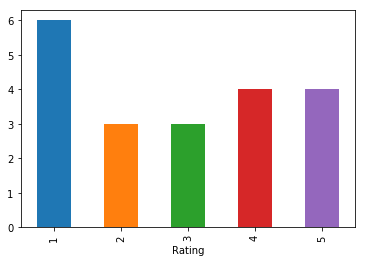

In [28]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

### Going through all the pages of the catalogue

In [29]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"

In [30]:
url

'http://books.toscrape.com/catalogue/page-1.html'

#### We need a for loop in this case to run through all the pages

In [31]:
max_page = 3
for page in range(1,max_page + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [34]:

all_books = { "Title": [], "Price": [], "Rating": []}
max_page = 20
for page in range(1, max_page + 1):
    print(f"Page: {page}")
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a").attrs["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
        all_books["Title"].append(title)
        all_books["Price"].append(price)
        all_books["Rating"].append(rating)

Page: 1
Page: 2
Page: 3
Page: 4
Page: 5
Page: 6
Page: 7
Page: 8
Page: 9
Page: 10
Page: 11
Page: 12
Page: 13
Page: 14
Page: 15
Page: 16
Page: 17
Page: 18
Page: 19
Page: 20


In [33]:
len(all_books["Title"])

400

#### Loading into a dataframe

In [35]:
all_books_df = pd.DataFrame.from_dict(all_books)
all_books_df.tail()

,Title,Price,Rating
395,Take Me Home Tonight (Rock Star Romance #3),53.98,3
396,Sleeping Giants (Themis Files #1),48.74,1
397,"Setting the World on Fire: The Brief, Astonish...",21.15,2
398,Playing with Fire,13.71,3
399,Off the Hook (Fishing for Trouble #1),47.67,3


#### books by price

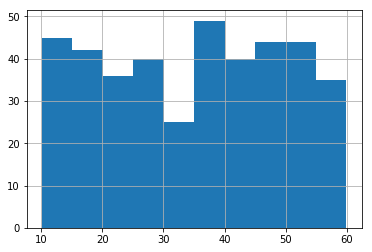

In [36]:
all_books_df["Price"].hist()

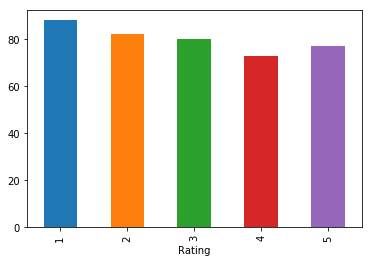

In [38]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [39]:
all_books_df.to_csv("allbooks.csv")